In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
# define linear H:
J=1
w=1
H_lin = np.array([[w, J], [J, w]])
H_lin

array([[1, 1],
       [1, 1]])

In [ ]:
# introduce non linearty:
kerr= 0.00192
E_inp= 0.5
g=kerr
g

0.00192

In [ ]:
H_sys= H_lin + g*np.identity(2) # non linear hermitian
H_sys

array([[1.00192, 1.     ],
       [1.     , 1.00192]])

In [ ]:
# Soliton generation

# iteration part:

#initial guess of psi:

psi= np.array([random.uniform(-10, 10),random.uniform(-10, 10)])

print(' Ψ_0  : ' , psi)

tolerance= 0.00001

while True:
  H_sys= H_lin + kerr  * (np.sum(psi**(2))  )*np.identity(2)

  eigenvalues, eigenvectors = np.linalg.eig(H_sys)

  psi1 = eigenvector=eigenvectors[0]

  psi2 = eigenvector=eigenvectors[1]

  #scalar product with the initial guess:

  s_product_1= np.sum(np.dot(psi,psi1))

  s_product_2= np.sum(np.dot(psi,psi2))

  if s_product_1 > s_product_2:
    if np.sum(psi1 - psi) ** 2 < tolerance:
      break
    else:
      psi=psi1
      print('psi',psi)

  elif s_product_1 <= s_product_2:
    if np.sum(psi2 - psi) ** 2 < tolerance:
      break
    else:
      psi=psi2
      print(' Ψ : ' , psi)






 Ψ_0  :  [-1.4831017  -3.87721127]
psi [ 0.70710678 -0.70710678]


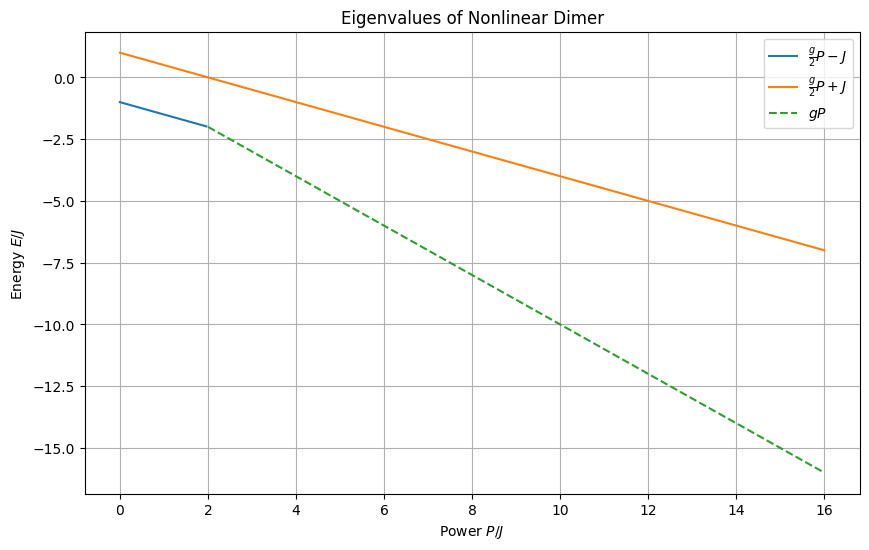

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
J = 1  # You can choose any convenient unit for J
g = -1  # Given nonlinearity parameter

# Define the range for power P
P = np.linspace(0, 16, 400)  # 400 points between 0 and 16

# Calculate the eigenvalues
eigenvalue1 = g/2 * P - J
eigenvalue2 = g/2 * P + J
eigenvalue_asymmetric = g * P

# Create the plot
plt.figure(figsize=(10, 6))

# Plot eigenvalues for P/J < 2
plt.plot(P[P/J < 2], eigenvalue1[P/J < 2], label=r'$\frac{g}{2}P - J$')
plt.plot(P, eigenvalue2, label=r'$\frac{g}{2}P + J$')

# Plot eigenvalues for P/J > 2
plt.plot(P[P/J >= 2], eigenvalue_asymmetric[P/J >= 2], label=r'$gP$', linestyle='--')

# Add labels and legend
plt.xlabel(r'Power $P/J$')
plt.ylabel(r'Energy $E/J$')
plt.title('Eigenvalues of Nonlinear Dimer')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


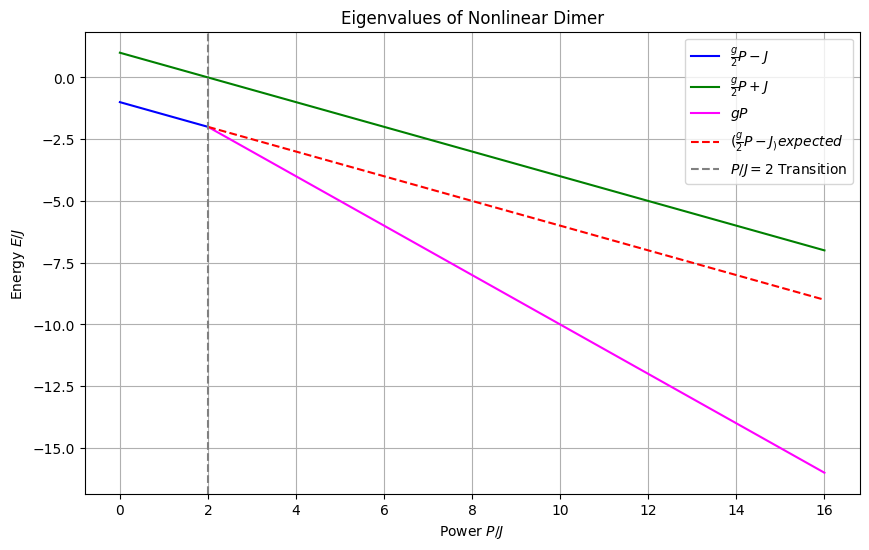

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
J = 1  # Coupling constant
g = -1  # Nonlinearity parameter

# Define the range for power P
P = np.linspace(0, 16, 400)  # 400 points between 0 and 16

# Initialize arrays to store eigenvalues
eigenvalues1 = np.zeros_like(P)
eigenvalues2 = np.zeros_like(P)
eigenvalue_asymmetric = np.zeros_like(P)

# Calculate the eigenvalues for each P
for i in range(len(P)):
    H = np.array([[g * P[i] / 2, -J], [-J, g * P[i] / 2]])
    eigenvalues, eigenvectors = np.linalg.eig(H)
    eigenvalues1[i] = np.min(eigenvalues)
    eigenvalues2[i] = np.max(eigenvalues)
    eigenvalue_asymmetric[i] = g * P[i]

# Plot the eigenvalues
plt.figure(figsize=(10, 6))

# Plot eigenvalues for P/J < 2
plt.plot(P[P/J < 2], eigenvalues1[P/J < 2], label=r'$\frac{g}{2}P - J$', color='blue')
plt.plot(P, eigenvalues2, label=r'$\frac{g}{2}P + J$', color='green')
plt.plot(P[P/J >= 2], eigenvalue_asymmetric[P/J >= 2], label=r'$gP$', color='magenta')

# Plot eigenvalues for P/J > 2
plt.plot(P[P/J >= 2], eigenvalues1[P/J >= 2], label=r'$(\frac{g}{2}P - J _){expected}$', linestyle='--', color='red')

# Add labels and legend
plt.xlabel(r'Power $P/J$')
plt.ylabel(r'Energy $E/J$')
plt.title('Eigenvalues of Nonlinear Dimer')
plt.axvline(x=2*J, color='grey', linestyle='--', label=r'$P/J=2$ Transition')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


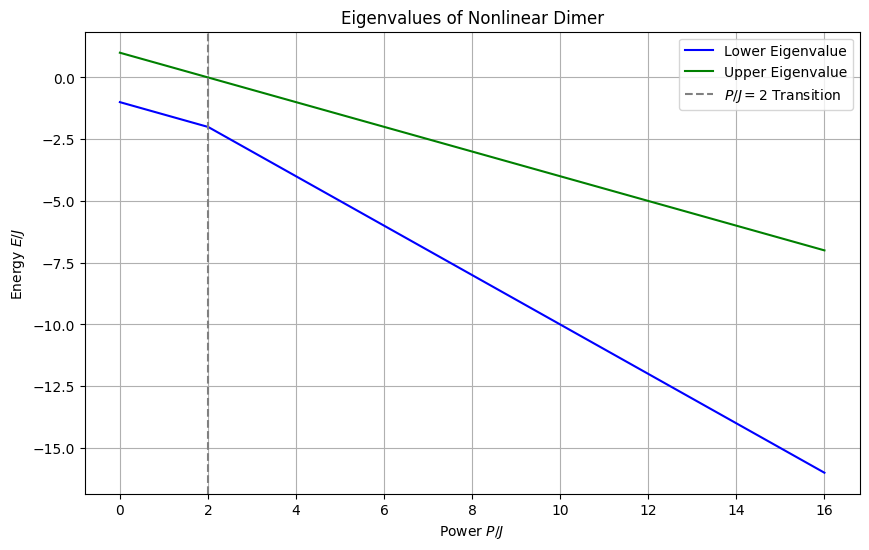

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
J = 1  # Coupling constant
g = -1  # Nonlinearity parameter

# Define the range for power P
P = np.linspace(0, 16, 400)  # 400 points between 0 and 16

# Calculate the eigenvalues
eigenvalue_symmetric = g/2 * P - J
eigenvalue_antisymmetric = g/2 * P + J
eigenvalue_asymmetric = g * P

# Initialize arrays to store combined eigenvalues
lower_eigenvalues = np.zeros_like(P)
upper_eigenvalues = np.zeros_like(P)

# Fill in the eigenvalues according to the regions
for i in range(len(P)):
    if P[i]/J < 2:
        lower_eigenvalues[i] = eigenvalue_symmetric[i]
        upper_eigenvalues[i] = eigenvalue_antisymmetric[i]
    else:
        lower_eigenvalues[i] = eigenvalue_asymmetric[i]
        upper_eigenvalues[i] = eigenvalue_antisymmetric[i]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the lower and upper eigenvalues
plt.plot(P, lower_eigenvalues, label=r'Lower Eigenvalue', color='blue')
plt.plot(P, upper_eigenvalues, label=r'Upper Eigenvalue', color='green')

# Add labels and legend
plt.xlabel(r'Power $P/J$')
plt.ylabel(r'Energy $E/J$')
plt.title('Eigenvalues of Nonlinear Dimer')
plt.axvline(x=2*J, color='grey', linestyle='--', label=r'$P/J=2$ Transition')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
